<a href="https://colab.research.google.com/github/domg-linu/NYC_WEATHER_PREDICTION/blob/main/Weather_Forecast_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [4]:
weather = pd.read_csv("3590909.csv", index_col= "DATE" )

In [5]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,6.04,NaN,NaN,0.27,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.05,NaN,248.0,0.21,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,5.37,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
weather.apply(pd.isnull).sum()/weather.shape[0]

station    0.000000
name       0.000000
acmh       0.511173
acsh       0.511130
awnd       0.374664
fmtm       0.567443
pgtm       0.475796
prcp       0.000085
snow       0.000171
snwd       0.000214
tavg       0.716770
tmax       0.000043
tmin       0.000043
tsun       0.998675
wdf1       0.511386
wdf2       0.567016
wdf5       0.570562
wdfg       0.781201
wdfm       0.999957
wesd       0.740611
wsf1       0.511258
wsf2       0.567016
wsf5       0.570605
wsfg       0.681137
wsfm       0.999915
wt01       0.657381
wt02       0.939073
wt03       0.938774
wt04       0.983764
wt05       0.984106
wt06       0.991455
wt07       0.995386
wt08       0.781072
wt09       0.992566
wt11       0.999402
wt13       0.906644
wt14       0.962102
wt15       0.998206
wt16       0.681222
wt17       0.997436
wt18       0.941594
wt19       0.999957
wt21       0.999786
wt22       0.997906
wv01       0.999957
dtype: float64

In [7]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN" ]].copy()

In [9]:
weather.columns = weather.columns.str.lower()

In [12]:
weather

,station,name,acmh,acsh,awnd,fmtm,pgtm,prcp,snow,snwd,...,wt13,wt14,wt15,wt16,wt17,wt18,wt19,wt21,wt22,wv01
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,6.04,NaN,NaN,0.27,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.05,NaN,248.0,0.21,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,5.37,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

PRCP    0.000085
SNOW    0.000171
SNWD    0.000214
TMAX    0.000043
TMIN    0.000043
dtype: float64

In [13]:
core_weather[pd.isnull(core_weather["PRCP"])]

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-05-29,NaN,0.0,0.0,66.0,52.0
1962-02-09,NaN,2.2,0.0,41.0,24.0


In [14]:
core_weather.loc["1960-05-20":"1960-06-20",:]

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-05-20,0.00,0.0,0.0,73.0,60.0
1960-05-21,0.05,0.0,0.0,77.0,56.0
1960-05-22,0.32,0.0,0.0,57.0,52.0
1960-05-23,0.50,0.0,0.0,60.0,53.0
1960-05-24,0.31,0.0,0.0,71.0,56.0
1960-05-25,0.00,0.0,0.0,72.0,56.0
1960-05-26,0.00,0.0,0.0,75.0,55.0
1960-05-27,0.00,0.0,0.0,78.0,57.0
1960-05-28,0.00,0.0,0.0,68.0,54.0


In [15]:
core_weather["PRCP"] = core_weather["PRCP"].fillna(0)

In [16]:
core_weather = core_weather.fillna(method="ffill")

In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

PRCP    0.0
SNOW    0.0
SNWD    0.0
TMAX    0.0
TMIN    0.0
dtype: float64

In [18]:
core_weather.dtypes

PRCP    float64
SNOW    float64
SNWD    float64
TMAX    float64
TMIN    float64
dtype: object

In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
       '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28', '2024-01-29'],
      dtype='object', name='DATE', length=23405)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29'],
              dtype='datetime64[ns]', name='DATE', length=23405, freq=None)

In [22]:
core_weather.apply(lambda x: (x==9999).sum())

PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

##DATA ANALYSIS

<Axes: xlabel='DATE'>

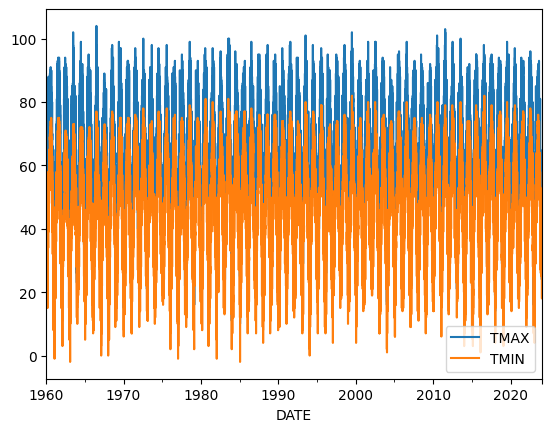

In [23]:
core_weather[["TMAX","TMIN"]].plot()

<Axes: xlabel='DATE'>

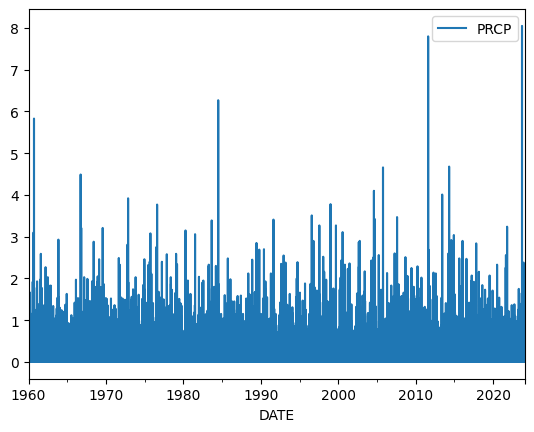

In [24]:
core_weather[["PRCP"]].plot()

## Machine Learning Model

In [25]:
core_weather["target"] = core_weather.shift(-1)["TMAX"]

In [26]:
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,41.0,26.0,45.0
1960-01-02,0.08,0.0,0.0,45.0,24.0,51.0
1960-01-03,0.68,0.0,0.0,51.0,38.0,40.0
1960-01-04,0.00,0.0,0.0,40.0,34.0,38.0
1960-01-05,0.00,0.0,0.0,38.0,31.0,38.0
...,...,...,...,...,...,...
2024-01-25,0.27,0.0,0.0,55.0,43.0,46.0
2024-01-26,0.21,0.0,0.0,46.0,41.0,48.0
2024-01-27,0.00,0.0,0.0,48.0,41.0,41.0


In [27]:
core_weather = core_weather.iloc[:-1,:].copy()

In [28]:
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,41.0,26.0,45.0
1960-01-02,0.08,0.0,0.0,45.0,24.0,51.0
1960-01-03,0.68,0.0,0.0,51.0,38.0,40.0
1960-01-04,0.00,0.0,0.0,40.0,34.0,38.0
1960-01-05,0.00,0.0,0.0,38.0,31.0,38.0
...,...,...,...,...,...,...
2024-01-24,0.09,0.0,0.0,45.0,36.0,55.0
2024-01-25,0.27,0.0,0.0,55.0,43.0,46.0
2024-01-26,0.21,0.0,0.0,46.0,41.0,48.0


In [29]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [30]:
predictors = ["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]

In [31]:
train = core_weather.loc[:"2020-12-31"]

In [32]:
test = core_weather.loc["2021-01-01":]

In [33]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [34]:
predictions = reg.predict(test[predictors])

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(test["target"], predictions)

5.141878966214892

In [37]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)
combined.columns = ["actual", "predictions"]

In [38]:
combined

,actual,predictions
DATE,,
2021-01-01,53.0,42.271455
2021-01-02,39.0,52.053074
2021-01-03,45.0,43.912318
2021-01-04,43.0,47.864042
2021-01-05,43.0,47.432481
...,...,...
2024-01-24,55.0,48.264330
2024-01-25,46.0,56.233276
2024-01-26,48.0,51.076271


<Axes: xlabel='DATE'>

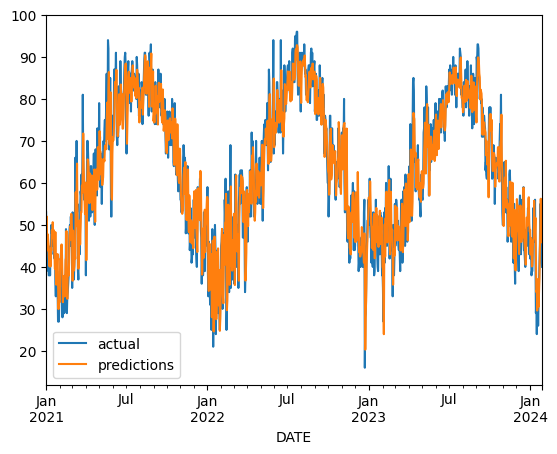

In [39]:
combined.plot()